In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/basic-of-kaggle-diabetes/sample_submission.csv
/kaggle/input/basic-of-kaggle-diabetes/train.csv
/kaggle/input/basic-of-kaggle-diabetes/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

# Datasets: 

In [3]:
train_set = pd.read_csv('/kaggle/input/basic-of-kaggle-diabetes/train.csv')
test_set = pd.read_csv('/kaggle/input/basic-of-kaggle-diabetes/test.csv')
submission=  pd.read_csv('/kaggle/input/basic-of-kaggle-diabetes/sample_submission.csv')

In [4]:
train_set.head(10)

,ID,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
1,1,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
2,2,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
3,3,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
4,4,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
5,5,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive
6,6,44,Male,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Positive
7,7,38,Male,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Positive
8,8,35,Male,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,Positive
9,9,61,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Positive


In [5]:
test_set.head()

,ID,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,0,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No
1,1,55,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes
2,2,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,3,45,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No
4,4,47,Male,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No


In [6]:
train_set.isnull().sum()

ID                    0
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [7]:
test_set.isnull().sum()

ID                    0
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  364 non-null    int64 
 1   age                 364 non-null    int64 
 2   gender              364 non-null    object
 3   polyuria            364 non-null    object
 4   polydipsia          364 non-null    object
 5   sudden_weight_loss  364 non-null    object
 6   weakness            364 non-null    object
 7   polyphagia          364 non-null    object
 8   genital_thrush      364 non-null    object
 9   visual_blurring     364 non-null    object
 10  itching             364 non-null    object
 11  irritability        364 non-null    object
 12  delayed_healing     364 non-null    object
 13  partial_paresis     364 non-null    object
 14  muscle_stiffness    364 non-null    object
 15  alopecia            364 non-null    object
 16  obesity             364 no

# Graphic: 

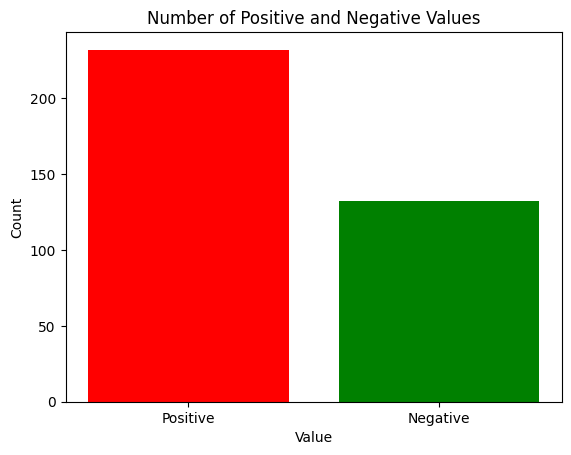

In [9]:
train_class = train_set['class'].value_counts()


plt.bar(train_class.index, train_class.values, color=['red','green'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Values')
plt.show()

# Data Analysis: 

In [10]:
lb_encoder =LabelEncoder()

for column in train_set.columns[1:]:
    train_set[column]= lb_encoder.fit_transform(train_set[column])

In [11]:
train_set.head()

,ID,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
1,1,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
2,2,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
3,3,42,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
4,4,43,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1


In [12]:
train_set.corrwith(train_set['class'])


ID                   -0.455019
age                   0.080641
gender               -0.438218
polyuria              0.672415
polydipsia            0.652493
sudden_weight_loss    0.437746
weakness              0.219472
polyphagia            0.357938
genital_thrush        0.105600
visual_blurring       0.261061
itching              -0.024880
irritability          0.292455
delayed_healing       0.041787
partial_paresis       0.418627
muscle_stiffness      0.117294
alopecia             -0.287605
obesity               0.073436
class                 1.000000
dtype: float64

In [13]:
train_set.shape

(364, 18)

In [14]:
train_set["age"] = (train_set['age'] - np.min(train_set['age']))/(np.max(train_set['age'])-np.min(train_set['age']))

In [15]:
X = train_set.drop(['class', 'ID','gender'], axis=1)
Y = train_set['class']


In [16]:
X.shape

(364, 15)

In [17]:
Y.shape

(364,)

# Machine Learning :

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# Predict model: 

In [21]:
# Making predictions on the test data
y_pred = rf_model.predict(X_test)

# Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Model accuracy: 98.63%


In [22]:
for column in test_set.columns[1:]:
    test_set[column]= lb_encoder.fit_transform(test_set[column])

In [23]:
# Drop unnecessary columns in the test set
X_test_final = test_set.drop(['ID','gender'], axis=1)

# Make predictions using the RandomForestClassifier
rf_predictions = rf_model.predict(X_test_final)


# Submission: 

In [24]:

# Update the submission DataFrame with the predicted values for RandomForest
submission['class'] = rf_predictions

In [25]:
# Make predictions using the Logistic Regression model
rf_predictions = model.predict(X_test_final)

# Update the submission DataFrame with the predicted values for Logistic Regression
submission['class'] = rf_predictions

# Save the submission DataFrame to a CSV file for Logistic Regression
submission.to_csv('submission.csv', index=False)

In [26]:
submission.head(20)

,ID,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0
